# Regresiones Lineales

## Regresión Lineal (Fuerza bruta)

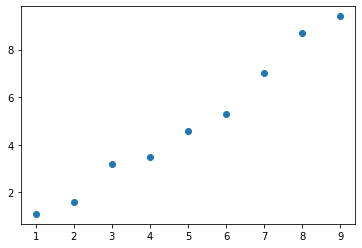

In [7]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1.1, 1.6, 3.2, 3.5, 4.6, 5.3, 7, 8.7, 9.4]

plt.scatter(x, y)

In [8]:
x_prom = sum(x) / len(x)
y_prom = sum(y) / len(y)

x_prom, y_prom

(5.0, 4.933333333333334)

In [26]:
n = len(x)

cov_xy = sum([(x[i] - x_prom) * (y[i] - y_prom) for i in range(n)]) / (n - 1)
cov_xx = sum([(x[i] - x_prom) * (x[i] - x_prom) for i in range(n)]) / (n - 1)

cov_xy, cov_xx, cov_xy / cov_xx

(7.9875, 7.5, 1.065)

In [27]:
m = cov_xy / cov_xx
b = y_prom - m * x_prom

m, b

(1.065, -0.3916666666666657)

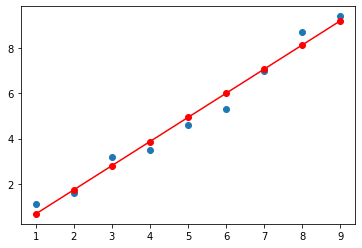

In [33]:
y_predict = [m * x[i] + b for i in range(n)]

plt.scatter(x, y)
plt.plot(x, y_predict, "r-o")


In [34]:
print(y)
print(y_predict)

[1.1, 1.6, 3.2, 3.5, 4.6, 5.3, 7, 8.7, 9.4]
[0.6733333333333342, 1.7383333333333342, 2.803333333333334, 3.868333333333334, 4.933333333333334, 5.998333333333334, 7.063333333333334, 8.128333333333334, 9.193333333333333]


## Regresión Lineal

In [ ]:
! pip install scikit-learn

In [41]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Máquina - LinearRegression(params...)

reg = LinearRegression() # Caja cerrada (implícito el modelo matemático)

X = np.array(x).reshape((n, 1)) # Impone una estructura sobre los datos

# [1, 2, 3, 4, 5, 6] -> ndim / figure | 1 / (6,) "1-tupla"
# [[1], [2], [3], [4], [5], [6]] -> ndim / figure | 2 / (6, 1) # 2-tupla
# [[1, 1], [2, 3], [3, 2], [4, 4], [5, 8]] -> ndim / figure | 2 / (5, 2) "2-tupla"

print(X)

# Procesa los mejores coefiecientes e interceptor para ajustar los datos
reg.fit(X, y) # Ejecutamos la máquina (ajuste de pesos / entrenamiento / optimizar)

print("coef ([m])", reg.coef_)
print("intercept (b)", reg.intercept_)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
coef ([m]) [1.065]
intercept (b) -0.3916666666666675


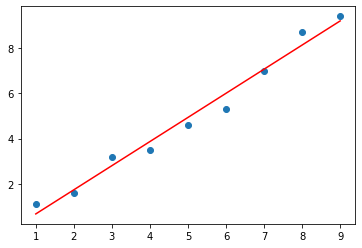

In [43]:
m = reg.coef_[0] # [m1, m2, m3] -> [[x1, x2, x3]]
b = reg.intercept_

y_predict = [m * x[i] + b for i in range(len(x))]

plt.scatter(x, y)
plt.plot(x, y_predict, "red")

## Regresión Lineal Multivariable (Multi-eje independiente)

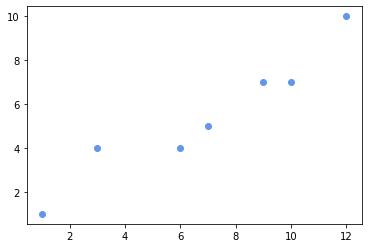

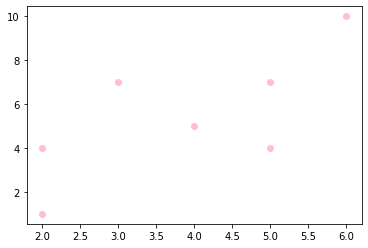

In [51]:
X = [ # 2:(7,2)
    [1, 2],
    [3, 5],
    [6, 2],
    [7, 4],
    [9, 5],
    [10, 3],
    [12, 6],
]

y = [1, 4, 4, 5, 7, 7, 10] # 1:(7,)

n = len(X)

x1 = [X[i][0] for i in range(n)]
x2 = [X[i][1] for i in range(n)]

plt.scatter(x1, y, c="cornflowerblue")
plt.show()
plt.clf()
plt.scatter(x2, y, c="pink")
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X, y)

print("coef", reg.coef_)
print("intercept", reg.intercept_)
# R^2 es la validación de las regresiones lineales (0 no lineal, 1 lineal completa)
print("r2", reg.score(X, y)) # R^2 (si es cercano a 1, hay un excelente ajuste)

coef [0.59425287 0.55344828]
intercept -0.7810344827586206
r2 0.9864281939490025


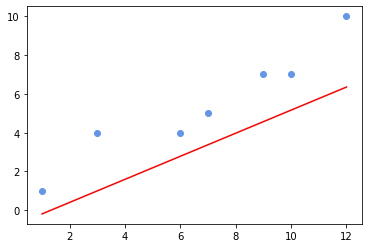

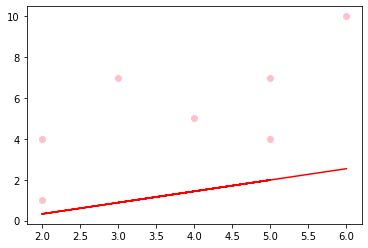

In [53]:
m1 = reg.coef_[0] # primera
m2 = reg.coef_[1] # segunda

b = reg.intercept_

y_predict_1 = [m1 * x1[i] + b for i in range(n)]
y_predict_2 = [m2 * x2[i] + b for i in range(n)]

plt.scatter(x1, y, c="cornflowerblue")
plt.plot(x1, y_predict_1, "red")
plt.show()

plt.clf()
plt.scatter(x2, y, c="pink")
plt.plot(x2, y_predict_2, "red")
plt.show()

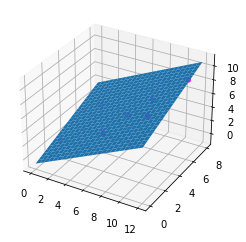

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.linspace(0, 12, 25)
Y = np.linspace(0, 8, 25)

X, Y = np.meshgrid(X, Y) # ??

Z = np.zeros((25, 25))

for i in range(25):
    for j in range(25):
        Z[i][j] = m1 * X[i][j] + m2 * Y[i][j] + b # ??

ax.plot_surface(X, Y, Z)

ax.scatter(x1, x2, y, c="magenta")

plt.show()